# Prediction using stacked LSTM's

In [1]:
from pandas_datareader.data import DataReader
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr

In [2]:
#Only for AAPL stocks
key="aa3f2e15d657950eecc8f776f96995e48ed2da9d"
df = pdr.get_data_tiingo('AAPL', api_key=key)
df

close     high     low    open    volume  \
symbol date                                                                   
AAPL   2016-07-01 00:00:00+00:00   95.89   96.465   95.33   95.49  26026540   
       2016-07-05 00:00:00+00:00   94.99   95.400   94.46   95.39  27705210   
       2016-07-06 00:00:00+00:00   95.53   95.660   94.37   94.60  30949090   
       2016-07-07 00:00:00+00:00   95.94   96.500   95.62   95.70  25139558   
       2016-07-08 00:00:00+00:00   96.68   96.890   96.05   96.49  28912103   
...                                  ...      ...     ...     ...       ...   
       2021-06-23 00:00:00+00:00  133.70  134.320  133.23  133.77  60214200   
       2021-06-24 00:00:00+00:00  133.41  134.640  132.93  134.45  68710998   
       2021-06-25 00:00:00+00:00  133.11  133.890  132.81  133.46  70783746   
       2021-06-28 00:00:00+00:00  134.78  135.245  133.35  133.41  62111303   
       2021-06-29 00:00:00+00:00  136.33  136.490  134.35  134.80  62012767   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
AAPL   2016-07-01 00:00:00+00:00   22.391605   22.525875   22.260837   
       2016-07-05 00:00:00+00:00   22.181442   22.277183   22.057680   
       2016-07-06 00:00:00+00:00   22.307540   22.337896   22.036664   
       2016-07-07 00:00:00+00:00   22.403280   22.534048   22.328556   
       2016-07-08 00:00:00+00:00   22.576080   22.625118   22.428967   
...                                      ...         ...         ...   
       2021-06-23 00:00:00+00:00  133.700000  134.320000  133.230000   
       2021-06-24 00:00:00+00:00  133.410000  134.640000  132.930000   
       2021-06-25 00:00:00+00:00  133.110000  133.890000  132.810000   
       2021-06-28 00:00:00+00:00  134.780000  135.245000  133.350000   
       2021-06-29 00:00:00+00:00  136.330000  136.490000  134.350000   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
AAPL   2016-07-01 00:00:00+00:00   22.298199  104106160      0.0          1.0  
       2016-07-05 00:00:00+00:00   22.274848  110820840      0.0          1.0  
       2016-07-06 00:00:00+00:00   22.090372  123796360      0.0          1.0  
       2016-07-07 00:00:00+00:00   22.347237  100558232      0.0          1.0  
       2016-07-08 00:00:00+00:00   22.531713  115648412      0.0          1.0  
...                                      ...        ...      ...          ...  
       2021-06-23 00:00:00+00:00  133.770000   60214200      0.0          1.0  
       2021-06-24 00:00:00+00:00  134.450000   68710998      0.0          1.0  
       2021-06-25 00:00:00+00:00  133.460000   70783746      0.0          1.0  
       2021-06-28 00:00:00+00:00  133.410000   62111303      0.0          1.0  
       2021-06-29 00:00:00+00:00  134.800000   62012767      0.0          1.0  

[1257 rows x 12 columns]

In [3]:
df.to_csv('AAPL.csv')

In [4]:
df = pd.read_csv('AAPL.csv')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-07-01 00:00:00+00:00,95.89,96.465,95.33,95.49,26026540,22.391605,22.525875,22.260837,22.298199,104106160,0.0,1.0
1,AAPL,2016-07-05 00:00:00+00:00,94.99,95.400,94.46,95.39,27705210,22.181442,22.277183,22.057680,22.274848,110820840,0.0,1.0
2,AAPL,2016-07-06 00:00:00+00:00,95.53,95.660,94.37,94.60,30949090,22.307540,22.337896,22.036664,22.090372,123796360,0.0,1.0
3,AAPL,2016-07-07 00:00:00+00:00,95.94,96.500,95.62,95.70,25139558,22.403280,22.534048,22.328556,22.347237,100558232,0.0,1.0
4,AAPL,2016-07-08 00:00:00+00:00,96.68,96.890,96.05,96.49,28912103,22.576080,22.625118,22.428967,22.531713,115648412,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,AAPL,2021-06-23 00:00:00+00:00,133.70,134.320,133.23,133.77,60214200,133.700000,134.320000,133.230000,133.770000,60214200,0.0,1.0
1253,AAPL,2021-06-24 00:00:00+00:00,133.41,134.640,132.93,134.45,68710998,133.410000,134.640000,132.930000,134.450000,68710998,0.0,1.0
1254,AAPL,2021-06-25 00:00:00+00:00,133.11,133.890,132.81,133.46,70783746,133.110000,133.890000,132.810000,133.460000,70783746,0.0,1.0
1255,AAPL,2021-06-28 00:00:00+00:00,134.78,135.245,133.35,133.41,62111303,134.780000,135.245000,133.350000,133.410000,62111303,0.0,1.0


In [5]:
df1 = df.reset_index()['close']

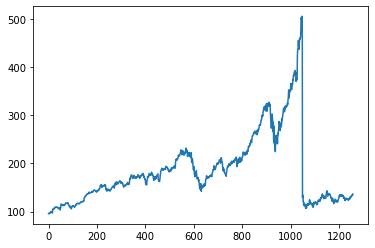

In [6]:
plt.plot(df1)

# MIN-Max Scaler

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [47]:
##splitting dataset into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [48]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [49]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [50]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [52]:
print(X_train.shape,y_train.shape)

(716, 100, 1) (716,)


In [53]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [54]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(X_train,y_train,validation_data = (X_test,ytest),epochs = 100,batch_size = 64,verbose = 1)

Epoch 1/100
12/12 [==============================] - 8s 249ms/step - loss: 0.0127 - val_loss: 0.0387
Epoch 2/100
12/12 [==============================] - 2s 152ms/step - loss: 0.0024 - val_loss: 0.0293
Epoch 3/100
12/12 [==============================] - 2s 151ms/step - loss: 0.0016 - val_loss: 0.0299
Epoch 4/100
12/12 [==============================] - 2s 155ms/step - loss: 9.4006e-04 - val_loss: 0.0209
Epoch 5/100
12/12 [==============================] - 2s 155ms/step - loss: 4.7502e-04 - val_loss: 0.0204
Epoch 6/100
12/12 [==============================] - 2s 146ms/step - loss: 4.2061e-04 - val_loss: 0.0212
Epoch 7/100
12/12 [==============================] - 2s 150ms/step - loss: 4.0622e-04 - val_loss: 0.0197
Epoch 8/100
12/12 [==============================] - 2s 150ms/step - loss: 3.8851e-04 - val_loss: 0.0187
Epoch 9/100
12/12 [==============================] - 2s 164ms/step - loss: 3.6737e-04 - val_loss: 0.0180
Epoch 10/100
12/12 [==============================] - 2s 168ms/step

12/12 [==============================] - 2s 161ms/step - loss: 1.5867e-04 - val_loss: 0.0093
Epoch 79/100
12/12 [==============================] - 2s 161ms/step - loss: 1.7249e-04 - val_loss: 0.0118
Epoch 80/100
12/12 [==============================] - 2s 160ms/step - loss: 1.9399e-04 - val_loss: 0.0081
Epoch 81/100
12/12 [==============================] - 2s 159ms/step - loss: 1.7385e-04 - val_loss: 0.0090
Epoch 82/100
12/12 [==============================] - 2s 159ms/step - loss: 1.4911e-04 - val_loss: 0.0095
Epoch 83/100
12/12 [==============================] - 2s 161ms/step - loss: 1.4291e-04 - val_loss: 0.0089
Epoch 84/100
12/12 [==============================] - 2s 159ms/step - loss: 1.4276e-04 - val_loss: 0.0087
Epoch 85/100
12/12 [==============================] - 2s 159ms/step - loss: 1.3231e-04 - val_loss: 0.0093
Epoch 86/100
12/12 [==============================] - 2s 160ms/step - loss: 1.3624e-04 - val_loss: 0.0094
Epoch 87/100
12/12 [==============================] - 2s 15

In [57]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [58]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [59]:
import math
from sklearn.metrics import mean_squared_error
import numpy

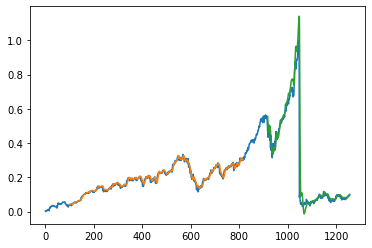

In [60]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [67]:
len(test_data)

440

In [69]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [70]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [71]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.09796972]
101
1 day input [0.10197032 0.09978108 0.09827293 0.09764048 0.09822428 0.09292143
 0.08720506 0.08445634 0.08484554 0.07543177 0.07509122 0.07385064
 0.06324495 0.06390173 0.07978594 0.07329117 0.06584773 0.061153
 0.06429093 0.05198249 0.06347604 0.06078813 0.06560448 0.06334225
 0.07054245 0.07438579 0.07241547 0.062126   0.06081245 0.06908295
 0.06701532 0.0610557  0.06227195 0.0637801  0.06421795 0.06059353
 0.06606665 0.06813427 0.07518852 0.07594259 0.08005351 0.08603746
 0.09244709 0.08817806 0.09593773 0.09009973 0.096108   0.09528095
 0.09693505 0.09272683 0.0936755  0.08988081 0.09567015 0.09664315
 0.09584043 0.0938701  0.09362685 0.08871321 0.09134031 0.07993189
 0.08054001 0.08452931 0.08567259 0.07749939 0.07521284 0.0675748
 0.0729263  0.07895889 0.07608854 0.0726344  0.0722452  0.07861834
 0.07404524 0.07810752 0.07762102 0.07749939 0.07368037 0.0720506
 0.07124787 0.07314522 0.06944782 0.07516419 0.07518852 0.07723182
 0.07818049 0.07569934 0.07871564 0.0

10 day output [[0.10806572]]
11 day input [0.07509122 0.07385064 0.06324495 0.06390173 0.07978594 0.07329117
 0.06584773 0.061153   0.06429093 0.05198249 0.06347604 0.06078813
 0.06560448 0.06334225 0.07054245 0.07438579 0.07241547 0.062126
 0.06081245 0.06908295 0.06701532 0.0610557  0.06227195 0.0637801
 0.06421795 0.06059353 0.06606665 0.06813427 0.07518852 0.07594259
 0.08005351 0.08603746 0.09244709 0.08817806 0.09593773 0.09009973
 0.096108   0.09528095 0.09693505 0.09272683 0.0936755  0.08988081
 0.09567015 0.09664315 0.09584043 0.0938701  0.09362685 0.08871321
 0.09134031 0.07993189 0.08054001 0.08452931 0.08567259 0.07749939
 0.07521284 0.0675748  0.0729263  0.07895889 0.07608854 0.0726344
 0.0722452  0.07861834 0.07404524 0.07810752 0.07762102 0.07749939
 0.07368037 0.0720506  0.07124787 0.07314522 0.06944782 0.07516419
 0.07518852 0.07723182 0.07818049 0.07569934 0.07871564 0.08632936
 0.08428606 0.08552664 0.08951593 0.08628071 0.09075651 0.0948431
 0.094162   0.09345658 0.

 0.1133067  0.11436859 0.11543167 0.11649518]
19 day output [[0.11755872]]
20 day input [0.05198249 0.06347604 0.06078813 0.06560448 0.06334225 0.07054245
 0.07438579 0.07241547 0.062126   0.06081245 0.06908295 0.06701532
 0.0610557  0.06227195 0.0637801  0.06421795 0.06059353 0.06606665
 0.06813427 0.07518852 0.07594259 0.08005351 0.08603746 0.09244709
 0.08817806 0.09593773 0.09009973 0.096108   0.09528095 0.09693505
 0.09272683 0.0936755  0.08988081 0.09567015 0.09664315 0.09584043
 0.0938701  0.09362685 0.08871321 0.09134031 0.07993189 0.08054001
 0.08452931 0.08567259 0.07749939 0.07521284 0.0675748  0.0729263
 0.07895889 0.07608854 0.0726344  0.0722452  0.07861834 0.07404524
 0.07810752 0.07762102 0.07749939 0.07368037 0.0720506  0.07124787
 0.07314522 0.06944782 0.07516419 0.07518852 0.07723182 0.07818049
 0.07569934 0.07871564 0.08632936 0.08428606 0.08552664 0.08951593
 0.08628071 0.09075651 0.0948431  0.094162   0.09345658 0.09272683
 0.0967891  0.10055947 0.09796972 0.099117

In [72]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

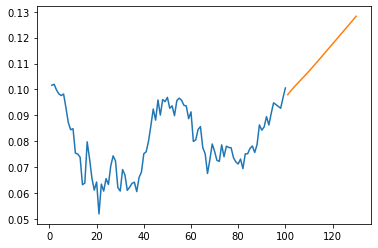

In [74]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

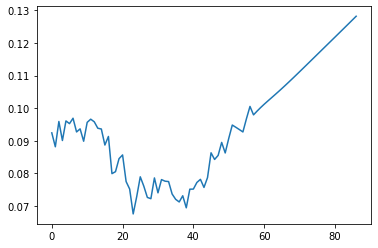

In [75]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [76]:
df3 = scaler.inverse_transform(df3).tolist()

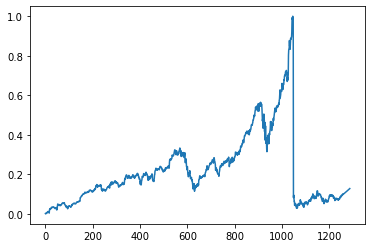

In [77]:
plt.plot(df3)